# PREDICTING FRAUDULENT TRANSACTIONS

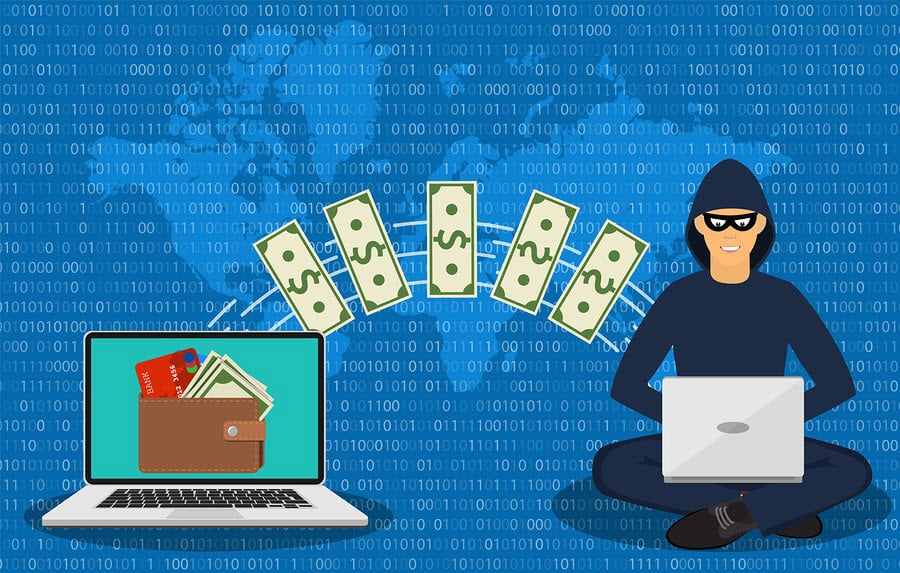

## PRE-PROCESSING

In [ ]:
import numpy as np
import pandas as pd
# Read the data
df=pd.read_csv("Fraud.csv")
df.shape

(6326491, 11)

In [ ]:
# Get head of the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#### ANALYSIS
dealing with null values

In [ ]:
# Check for null values
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
# removing null values 
df = df.dropna()


## No need to check outliers because outliers in amount can say that some anomaly transaction has been happened

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6326485,688,CASH_OUT,126250.92,C1704929063,0.0,0.00,C1428134875,3794396.09,3920647.01,0.0,0.0
6326486,688,CASH_OUT,53633.23,C960404328,0.0,0.00,C1840377564,248797.78,302431.01,0.0,0.0
6326487,688,CASH_OUT,109253.28,C247887577,540419.0,431165.72,C989357631,0.00,109253.28,0.0,0.0
6326488,688,CASH_OUT,3931.34,C1878014674,11855.0,7923.66,C1274234564,2174826.85,2178758.19,0.0,0.0


In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Percentage of Legit transactions: {:.2f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.2f} %".format(fraud_percent))

Percentage of Legit transactions: 99.88 %
Percentage of Fraud transactions: 0.12 %


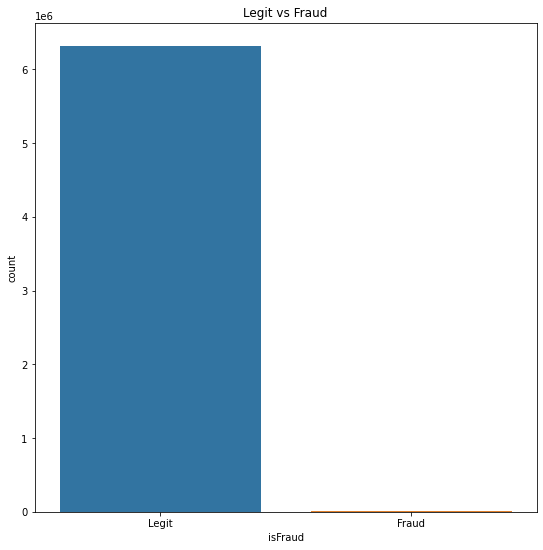

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#distribution of classes for prediction
plt.figure(figsize=(9,9))
sns.countplot(x="isFraud",data=df)
labels = ["Legit", "Fraud"]
plt.title("Legit vs Fraud")
plt.xticks(range(2), labels)
plt.show()



# so we can see our data is highly imbalanced , if we go for oversampling then overfitting will happen and also if we go with undersampling then have to deal with underfitting problem

## To deal with with this decision tree will be better option. Decision trees seem to perform pretty well with imbalanced datasets. Since they work by coming up with conditions/rules at each stage of splitting, they end up taking both classes into consideration.

In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


## For merchants there is no information regarding the attribites oldbalanceDest and newbalanceDest. 

#### CORRELATION HEATMAP

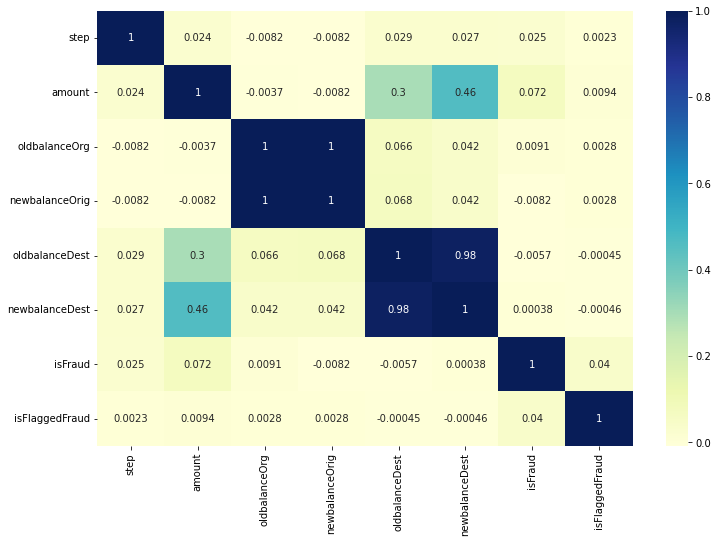

In [ ]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

## PROBLEM SOLVING

In [ ]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6326490 entries, 0 to 6326489
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 579.2+ MB


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

#### LABEL ENCODING

In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
objList

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6326490 entries, 0 to 6326489
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(4)
memory usage: 579.2 MB
None


In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,753469,170136.0,160296.36,1651511,0.0,0.0,0.0,0.0
1,1,3,1864.28,2176530,21249.0,19384.72,1722963,0.0,0.0,0.0,0.0
2,1,4,181.00,996431,181.0,0.00,436454,0.0,0.0,1.0,0.0
3,1,1,181.00,5795191,181.0,0.00,388795,21182.0,0.0,1.0,0.0
4,1,3,11668.14,3426310,41554.0,29885.86,823177,0.0,0.0,0.0,0.0


#### DEALING WITH MULTICOLINEARITY

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.835248
1,type,4.491099
2,amount,4.175507
3,nameOrig,2.776627
4,oldbalanceOrg,611.015607
5,newbalanceOrig,617.396600
6,nameDest,3.304315
7,oldbalanceDest,73.397620
8,newbalanceDest,85.141527
9,isFraud,1.185340


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.698131
1,amount,3.846751
2,isFraud,1.175127
3,isFlaggedFraud,1.001973
4,Actual_amount_orig,1.310309
5,Actual_amount_dest,3.783324
6,TransactionPath,2.684399


<AxesSubplot:>

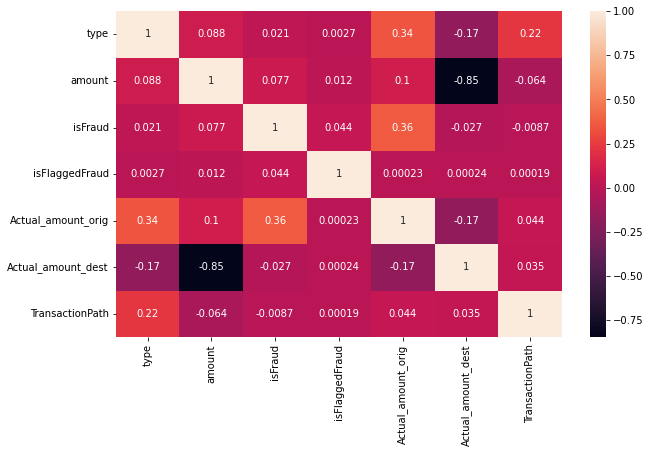

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap="Greens",annot=True)

## <br>How did you select variables to be included in the model?
<br>Using the VIF values and correlation heatmap. .we took one of the less correlated column from two highly correlated attributes

## MODEL BUILDING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### NORMALIZING (SCALING) AMOUNT

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["amount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

#### TRAIN-TEST SPLIT

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4428543, 6)
Shape of X_test:  (1897947, 6)


#### MODEL TRAINING

In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)


Decision Tree Score:  99.92692103625654


In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[1894946     716]
 [    671    1614]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1895662
         1.0       0.69      0.71      0.70      2285

    accuracy                           1.00   1897947
   macro avg       0.85      0.85      0.85   1897947
weighted avg       1.00      1.00      1.00   1897947



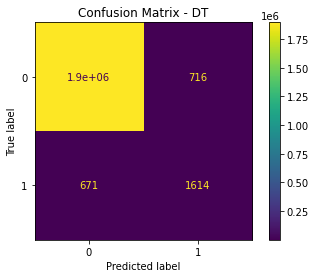

In [ ]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# Random forest ensemble technique is used when decision tree gives us poor performance to solve this issue we combine multiple decision trees to get good performance of model

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.9618008300548


<br>TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
<br>FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
<br>TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
<br>FN(Decision Tree) ~ FN(Random Forest)

<br> Here Random Forest looks good.

In [ ]:

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1895599      63]
 [    662    1623]]


In [ ]:

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1895662
         1.0       0.96      0.71      0.82      2285

    accuracy                           1.00   1897947
   macro avg       0.98      0.86      0.91   1897947
weighted avg       1.00      1.00      1.00   1897947



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

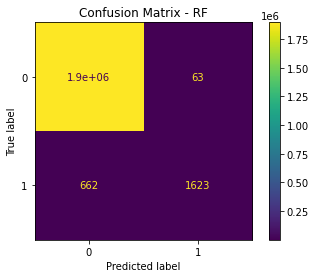

In [ ]:

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

## CONCLUSION

<br>As Accuracy of both Random Forest and Decision Tree is equal and no need to use ensemble technique but precision of Random Forest is more. In a fraud detection model or when the data is highly imbalance then accuracy is not good option to look for instead we see the precision and F1 score, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
<br>This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

<br>Also the reason I have chosen this model is because of highly unbalanced dataset. Random forest makes multiple decision trees which makes it easier (although time taking but when we use distributive environment like apache spark this time can significantly reduce) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

<br>Models like XGBoost, Bagging and ANN may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?
1. Amount of money transacted
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.
4. The source of request is secured or not ?


Do these factors make sense? If yes, How? If not, How not? 

yes , if a person is doing transaction in the range of 1000 to 10000 and if suddenly that person does the transaction of 1 lakh then it does make sense that this is fraudulent

What kind of prevention should be adopted while company update its infrastructure?
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
4. Always keep a log of your payments.

## Improvements can be done using considering apache spark or hadoop framework that can distribute this large data into multiple clusters and the time taken on training can significantly reduce.